In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import scipy
from scipy import stats, misc

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [6]:
A = np.array([[4, 4], [-3, 3]])
[D, V] = LA.eig(A.transpose().dot(A))

print (V)

print (D)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[ 32.  18.]


In [8]:
A = np.array([[4, 4], [-3, 3]])
[D, U] = LA.eig(A.dot(A.transpose()))

print (U)
print (D)

[[ 1.  0.]
 [ 0.  1.]]
[ 32.  18.]


In [9]:
[U, S, V] = LA.svd(A)
print (U)
print (S)
print (V)

[[ -1.00000000e+00  -3.70074342e-18]
 [  3.70074342e-18   1.00000000e+00]]
[ 5.65685425  4.24264069]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [83]:
A =np.array([[11.08,   6.82,    1.76 , -6.82],
      [2.50,  -1.01 ,  -2.60 ,  1.19],
     [-4.88,  -5.07  , -3.21 ,  5.20],
     [-0.49,   1.52   , 2.07 , -1.66],
    [-14.04,  -12.40 , -6.66 , 12.65],
      [0.27 , -8.51 , -10.19 ,  9.15],
      [9.53 , -9.84 , -17.00 , 11.00],
    [-12.01,   3.64 ,  11.10 , -4.48]])

[U,S,V] = LA.svd(A)
print (U)

print (S)

print (V)

[[-0.24642369  0.44536234  0.6205749   0.32739909  0.45915182  0.05410587
  -0.18650735  0.00956801]
 [ 0.07432183  0.10750102  0.28337342 -0.77803389 -0.10352762  0.32547077
  -0.42245245  0.04655432]
 [ 0.21369502 -0.1903207   0.49492174  0.11043549 -0.4736735  -0.61498898
  -0.24132713 -0.01233476]
 [-0.08223154 -0.02472167  0.20057294  0.06152361 -0.27047805  0.29819169
   0.20131309 -0.86371786]
 [ 0.50375686 -0.55378628  0.13739629 -0.02351069  0.61002316  0.01682912
  -0.07593043 -0.20479838]
 [ 0.43719294  0.03496575 -0.05496539  0.50172005 -0.29664823  0.55199001
  -0.3572128   0.18055856]
 [ 0.59019451  0.42657675  0.21078205 -0.13667122 -0.03298713 -0.00394525
   0.6243326   0.1252985 ]
 [-0.2967926  -0.51321848  0.42787997  0.0231769  -0.14042827  0.34499254
   0.40598717  0.40166774]]
[  3.68258450e+01   2.62368811e+01   2.20213307e-02   5.10429562e-03]
[[-0.03564832 -0.5381828  -0.61426544  0.5759917 ]
 [ 0.92076022  0.16617467 -0.32597333 -0.13538086]
 [-0.13920696 -0.49

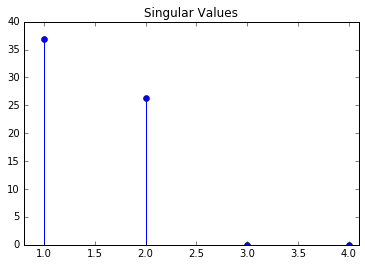

In [84]:
%matplotlib inline
sig_val = S
sig_val = sig_val[0:4]
plt.stem(range(1,5),sig_val)
plt.xlim([0.8, 4.1])
plt.title('Singular Values')
plt.show()

array([[-0.03564832, -0.5381828 , -0.61426544,  0.5759917 ],
       [ 0.92076022,  0.16617467, -0.32597333, -0.13538086],
       [-0.13920696, -0.49222525, -0.31155848, -0.80079151],
       [-0.36269992,  0.66367127, -0.6475729 , -0.09294376]])

In [50]:
k = 2

#V is not equal the result of matlab SVD
# V_python = transpose(V_matlab)

low_U = U[:,0:k]
low_S = np.diag(S[0:k])
low_V = V[0:k,:]



In [52]:
A_approx = (low_U.dot(low_S)).dot(low_V)
A_approx

array([[ 11.08250851,   6.8256176 ,   1.76533991,  -6.80890115],
       [  2.49942829,  -1.00429274,  -2.60062751,   1.19462804],
       [ -4.87827835,  -5.06500943,  -3.20623934,   5.20878009],
       [ -0.48927124,   1.52196569,   2.07157948,  -1.65643381],
       [-14.03962233, -12.39843105,  -6.65913505,  12.65241176],
       [  0.27076035,  -8.51229541, -10.18871873,   9.14926874],
       [  9.53039313,  -9.83725225, -16.99900559,  11.0036522 ],
       [-12.00864542,   3.64455947,  11.10301226,  -4.47244356]])

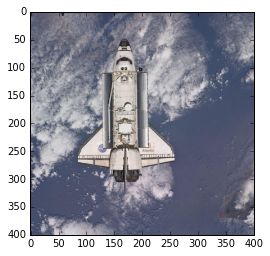

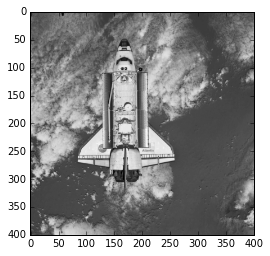

In [54]:
%matplotlib inline
im = misc.imread('./image_files/SpaceShuttle_01.jpg')
suqered_im = im[:, 0:2800, :]
w = misc.imresize(suqered_im, [400,400])

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

g = rgb2gray(w)

plt.imshow(w)
plt.show()
plt.imshow(g, cmap = plt.get_cmap('gray'))
plt.show()

In [55]:
U,S,V = LA.svd(g)
matS=np.diag(S)

<Container object of 3 artists>

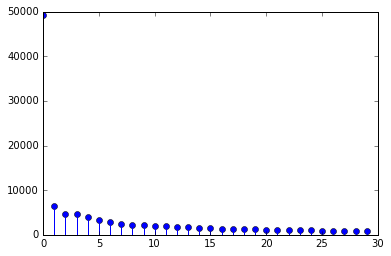

In [56]:
%matplotlib inline
plt.stem(S[0:30])
plt.show()

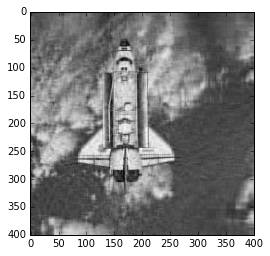

In [57]:
%matplotlib inline
k = 30 # low rank approximation

low_U = U[:, 0:k]
low_S = matS[0:k, 0:k]
low_V = V[0:k, :]

A_approx = (low_U.dot(low_S)).dot(low_V)
plt.imshow(A_approx, cmap = plt.get_cmap('gray'))
plt.show()

In [60]:
def plot_svd_rank(k = 5):
    low_U = U[:, 0:k]
    low_S = matS[0:k, 0:k]
    low_V = V[0:k, :]

    A_approx = (low_U.dot(low_S)).dot(low_V)
    plt.imshow(A_approx, cmap = plt.get_cmap('gray'))

    plt.title('rank'+ str(k))
    plt.show()

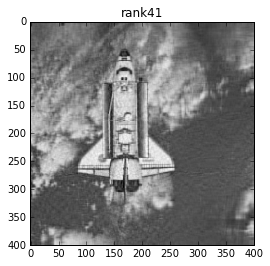

In [61]:
%matplotlib inline
from IPython.html.widgets import interact
interact(plot_svd_rank, k = [1, 400, 10]);

In [70]:
[X, Y] = np.meshgrid(np.arange(0, 3*np.pi/2, np.pi/30), np.arange(0, 3*np.pi/2, np.pi/30))
Z = np.sin(X*Y*np.pi/3)

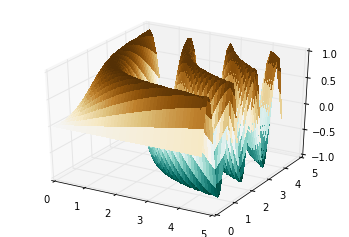

In [53]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.BrBG_r,
                       linewidth=0, antialiased=False)
plt.show()

In [104]:
maxNoise = 0.1
[nRows, nCols] = np.shape(Z)
noise = 2*maxNoise*np.random.rand(nRows,nCols) - maxNoise
Znoise = Z + noise


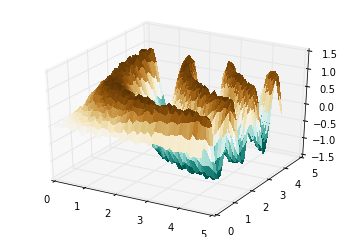

In [105]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Znoise, rstride=1, cstride=1, cmap=cm.BrBG_r,
                       linewidth=0, antialiased=False)
plt.show()

In [106]:
[U,S,V] = LA.svd(Znoise,0);

(0, 15)

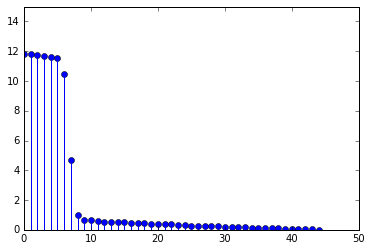

In [107]:
%matplotlib inline
plt.stem(S)
plt.xlim([0, 50])
plt.ylim([0, 15])

In [108]:
k = 8

Znoiseless = (U[:,0:k].dot(np.diag(S[0:k]))).dot(V[0:k,:])

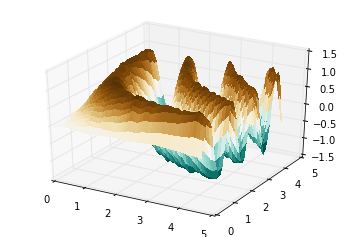

In [127]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Znoiseless, rstride=1, cstride=1, cmap=cm.BrBG_r,
                       linewidth=0, antialiased=False)
plt.show()

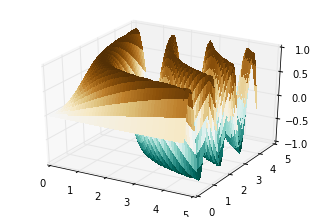

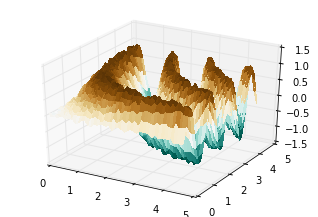

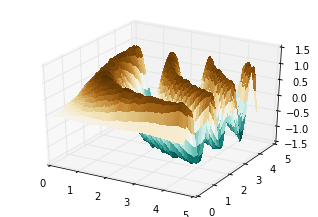

In [129]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)
fig1 = plt.figure()
ax1 = fig1.add_subplot(2, 2, 1, projection='3d')
surf = ax1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.BrBG_r,
                       linewidth=0, antialiased=False)

fig2 = plt.figure()
ax2 = fig2.add_subplot(2, 2, 2, projection='3d')
surf = ax2.plot_surface(X, Y, Znoise, rstride=1, cstride=1, cmap=cm.BrBG_r,
                       linewidth=0, antialiased=False)

fig3 = plt.figure()
ax3 = fig3.add_subplot(2, 2, 4, projection='3d')
surf = ax3.plot_surface(X, Y, Znoiseless, rstride=1, cstride=1, cmap=cm.BrBG_r,
                       linewidth=0, antialiased=False)

plt.show()

In [2]:
from scipy import io

In [9]:
# python 3
faces = io.loadmat('./image_files/faces.mat')

In [10]:
face_mat = faces['faces']

In [11]:
#face_mat_new.shape

In [12]:
row, col, m = face_mat.shape

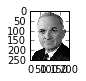

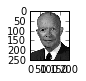

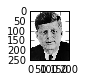

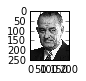

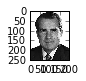

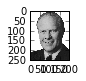

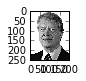

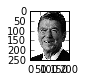

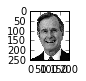

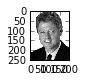

In [130]:
%matplotlib inline
for i in range(0,10,1):
    plt.subplot(4,3,i+1)
    plt.imshow(face_mat[:, :, i], cmap = plt.get_cmap('gray'))
    plt.show()
    

In [132]:
X = np.reshape(face_mat, [row*col, m])
U, S, V = LA.svd(X,0)

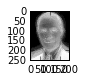

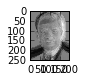

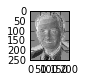

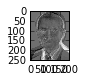

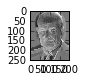

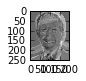

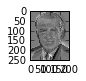

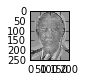

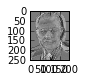

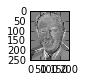

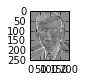

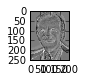

In [133]:
%matplotlib inline
for i in range(0, 12, 1):
    plt.subplot(4, 3, i+1)
    plt.imshow(np.reshape(U[:, i], [row, col]), cmap = plt.get_cmap('gray'))
    plt.show()

<Container object of 3 artists>

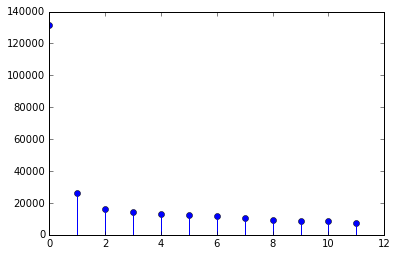

In [16]:
%matplotlib inline
plt.stem(S)

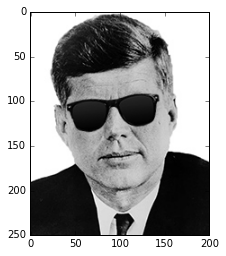

In [17]:
%matplotlib inline
NowImage = misc.imread('image_files/jfk.png');
plt.imshow(NowImage, cmap =  plt.get_cmap('gray'))
InImage = np.reshape(NowImage, [row*col, 1])

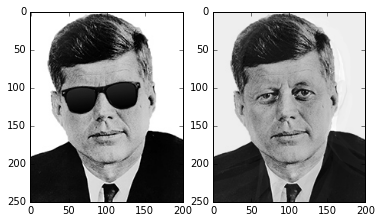

In [134]:
%matplotlib inline
U.shape

eigenface = U.transpose().dot(InImage)
ReshapedImage = np.reshape(U.dot(eigenface), [row, col])

plt.subplot(1,2,1)
plt.imshow(NowImage, cmap = plt.get_cmap('gray'))
plt.subplot(1,2,2)
plt.imshow(ReshapedImage, cmap = plt.get_cmap('gray') )